# Final Project
## Graph Coloring
## Xiang Lan, Ju Lin

### 1. Given vertices and edges number, generate adjacent matrix 

In [2]:
import random
import numpy as np
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# generate adjacent matrix for the graph
class random_generate_graph(object):
    
    def __init__(self,vertices_number,edges_number):
        self.v = vertices_number
        self.e = edges_number
        self.graph_dict = {}
        self.matrix = [[0 for i in range(self.v)] for j in range(self.v)]
            
    def adjacent_matrix(self):
        # for a undirected connected graph without self loop, the maximum edges number
        max_edges_number = int(self.v*(self.v-1)/2)
        
        # if bigger than the max numbers of edges, return False
        # Also, for a connected graph, the edges number should at least verges number minus 1
        if self.e > max_edges_number or self.e < self.v - 1:
            print('False edges number')
            return False
        
        # store the matrix index i,j in list
        edges = []
        for i in range(self.v):
            for j in range(i+1,self.v):
                edges.append((i,j))
                
        # first get a connected graph with n vertice, n-1 edges
        for i in range(0,self.v-1):
            j = random.randint(i+1,self.v-1)
            self.matrix[i][j] = 1
            self.matrix[j][i] = 1
            # remove the edges used
            edges.remove((i,j))
            
        # get the remain edges number
        remain_edge_num = self.e - self.v + 1
        # random get the remain edges index                        
        remain_edge_index = sorted(random.sample(range(0,len(edges)),remain_edge_num))
        
        # for a undirected graph, its adjacent matrix is symmetric
        for k in remain_edge_index:
            i = edges[k][0]
            j = edges[k][1]
            self.matrix[i][j] = self.matrix[j][i] = 1
            
        # the vertices should not be self connected
        for index in range(self.v):
                self.matrix[index][index] = 0
        
        print ("Initializing a graph with %d vertices and %d edges" % (self.v,self.e))
    
    # trans the matrix to dict for convenient use 
    def matrix_to_dict(self):
        for i,row in enumerate(self.matrix):
            self.graph_dict[i] = []
            for j, adjacent in enumerate(row):
                if adjacent:
                    self.graph_dict[i].append(j)                    
        
    # draw graph from the adjacent matrix
    def draw_color(self,color):
        G = nx.from_numpy_matrix(np.array(self.matrix)) 
        nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=color,with_labels=True)
    
    # draw the graph after coloring
    def draw(self):
        G = nx.from_numpy_matrix(np.array(self.matrix))
        nx.draw(G, with_labels=True)
        

Initializing a graph with 6 vertices and 9 edges
[[0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 1, 1], [0, 0, 1, 0, 0, 1], [1, 1, 1, 0, 0, 1], [1, 1, 1, 1, 1, 0]]


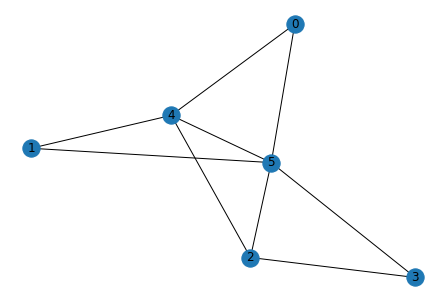

In [79]:
# Test example
test = random_generate_graph(6,9)
test.adjacent_matrix()
test.matrix_to_dict()
print(test.matrix)
test.draw()

### 2. Brute Force Alogrithm (Backtracking and Backtracking with pruning)

In [83]:
class Backtracking(): 
    #initialize the total number vertices and adjacent matrix
    def __init__(self, V_total, adjMatrix): 
        self.V_total = V_total 
        self.graph = adjMatrix 
   
   # is safe for vertex v 
    def isSafe(self, v, colour, c): 
        for i in range(self.V_total): 
            if self.graph[v][i] == 1 and colour[i] == c: 
                return False
        return True
      
    # backtracking to solve m coloring problem 
    # this will run n*c^n times, n is the number of vertices and c is the number of colors
    def graphColourHelper(self, m, colour, v): 
        #if v is the last node, sucess coloring
        if v == self.V_total: 
            return True
        
        # c is the number of colors, for each node, try every color to check safe or not 
        for c in range(1, m+1): 
            if self.isSafe(v, colour, c) == True: 
                colour[v] = c 
                if self.graphColourHelper(m, colour, v+1) == True: 
                    return True
                colour[v] = 0
    # runing graph coloring
    def graphColouring(self, m): 
        colour = [0] * self.V_total 
        if self.graphColourHelper(m, colour, 0) == None: 
            return False
  
        return colour

# backtracking with pruning
class Backtracking_pruning(): 
    #initialize the total number vertices and adjacent matrix
    def __init__(self, V_total, adjMatrix): 
        self.V_total = V_total 
        self.graph = adjMatrix 
   
   # is safe for vertex v 
    def isSafe(self, v, colour, c): 
        for i in range(self.V_total): 
            if self.graph[v][i] == 1 and colour[i] == c: 
                return False
        return True
      
    # backtracking with pruning to solve m coloring problem 
    # 
    def graphColourHelper(self, m, last, colour, v): 
        #if v is the last node, sucess coloring
        if v == self.V_total: 
            return True
        
        # c is the number of colors, last is the previous the largerest color number
        # Try the previously used colors first 
        for c in range(1, last+1): 
            if self.isSafe(v, colour, c) == True: 
                colour[v] = c 
                if self.graphColourHelper(m, last, colour, v+1) == True: 
                    return True
                colour[v] = 0
        #try new color if old corlor cannot meet the requirement
        if last < m:
            colour[v] = last + 1
            if self.graphColourHelper(m, last+1, colour, v+1) == True:
                return True
    # runing graph coloring
    def graphColouring(self, m): 
        colour = [0] * self.V_total 
        last = 1
        if self.graphColourHelper(m, last, colour, 0) == None: 
            return False
  
        return colour



3


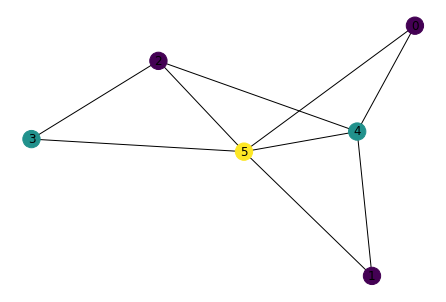

In [84]:
def BruteP_run(N, adj):
    N = N
    g = Backtracking_pruning(N, adj)
    for m in range(1, N):
        color = g.graphColouring(m)
        if color:
            return color
        else:
            continue
def Brute_run(N, adj):
    N = N
    g = Backtracking(N, adj)
    for m in range(1, N):
        color = g.graphColouring(m)
        if color:
            return color
        else:
            continue
color = Brute_run(test.v, test.matrix)
color_num = max(color)
print(color_num)
test.draw_color(color)



3


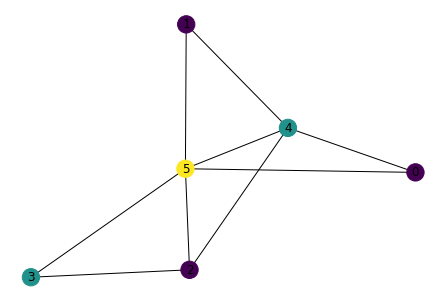

In [85]:
color = BruteP_run(test.v, test.matrix)
color_num = max(color)
print(color_num)
test.draw_color(color)

### 3. Using Welsh Powell Alogrithm to do grapg coloring

In [73]:
import heapq

# test if the vertice have the same color with its adjacent vertice 
def test_valid(vertice,graph_map,color_map):
    for i in graph_map[vertice]:
        if color_map[i] == color_map[vertice]:
            return False
    return True

def welsh_powell(graph_map):   
    # get the degree for every vertice
    degree = {}
    for k,v in graph_map.items():
        degree[k] = len(v)

    # build prioity queue using the dict value
    degree_pq = []
    for k,v in degree.items():
        heapq.heappush(degree_pq,(v,k))

    # store the vertices in ascending order of degree
    v_degree_list = []
    for i in range(len(degree)):
        v_degree_list.append(heapq.heappop(degree_pq)[1])
    # get the vertice in discending order of degree    
    v_degree_list.reverse()
    
    
    # set color for the graph
    color_map = []
    for i in range(len(graph_map)):
        color_map.append(0)
    color_index = 1
    used = []
    
    #print(v_degree_list)
    #print(color_map)
    
    for vertice in v_degree_list:
        if vertice not in used:
            # vertices set color
            if color_map[vertice] == 0:
                color_map[vertice] = color_index
            used.append(vertice)
            # not connect set same color
            for other_vertice in v_degree_list:
                if (other_vertice not in graph_map[vertice]) and (color_map[other_vertice] == 0):
                    color_map[other_vertice] = color_index
                    
                    if test_valid(other_vertice,graph_map,color_map) == False:
                        color_map[other_vertice] = 0
                    else:
                        used.append(other_vertice)
            color_index += 1
    color_num = color_index -1 
    return color_map,color_num

In [74]:
welsh_powell(test.graph_dict)

([4, 1, 2, 3, 1, 2], 4)

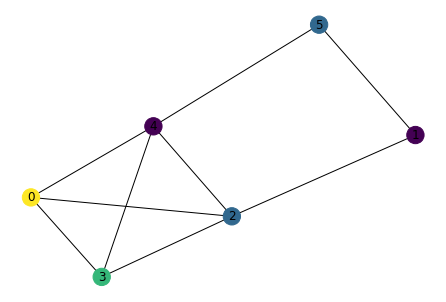

In [75]:
test.draw_color(welsh_powell(test.graph_dict)[0])

In [76]:
%timeit welsh_powell(test.graph_dict)

5.82 µs ± 44 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 4. Time Complexity Analysis

In [51]:
for i in (5,15,25,35,45,50):
    new = random_generate_graph(i,i+2)
    new.adjacent_matrix()
    new.matrix_to_dict()
    brute = Backtracking(new.v, new.matrix)
    %timeit welsh_powell(new.graph_dict)
    %timeit Brute_run(new.v, new.matrix)
    %timeit BruteP_run(new.v, new.matrix)


Initializing a graph with 5 vertices and 7 edges
4.54 µs ± 34.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20.9 µs ± 112 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
14 µs ± 70.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Initializing a graph with 15 vertices and 17 edges
15.4 µs ± 33.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.2 ms ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
914 µs ± 2.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Initializing a graph with 25 vertices and 27 edges
27.6 µs ± 124 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
25.8 ms ± 92.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
9.66 ms ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Initializing a graph with 35 vertices and 37 edges
37.7 µs ± 199 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
186 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [57]:
for i in (19,30,40,50,80):
    new = random_generate_graph(20,i)
    new.adjacent_matrix()
    new.matrix_to_dict()
    brute = Backtracking(new.v, new.matrix)
    %timeit welsh_powell(new.graph_dict)
    %timeit Brute_run(new.v, new.matrix)
    %timeit BruteP_run(new.v, new.matrix)

Initializing a graph with 20 vertices and 19 edges
21.6 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
6.25 ms ± 21.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.01 ms ± 5.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Initializing a graph with 20 vertices and 30 edges
22.9 µs ± 210 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
403 µs ± 1.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
291 µs ± 2.16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Initializing a graph with 20 vertices and 40 edges
25.9 µs ± 94.2 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
275 ms ± 1.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.97 ms ± 8.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Initializing a graph with 20 vertices and 50 edges
28.7 µs ± 108 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
136 ms ± 439 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
15.9 ms